# Aula 11 - Exercício 10
## Aprendizado não supervisionado: K-means
### Alunos:
- Bruno Gomes Coelho       - 9791160
- Bruno Mendes da Costa - 9779433

 

---
### RGB Color cube
Uma cor no sistema de cor *RGB* é definia pela tupla $(r, g, b)$, onde $r, g$ e $b$ correspondem às proporções de cada componente vermelho, verde e azul, respectivamente. Geralmente, $r, g$ e $b$ são definidos no intervalo inteiro entre $[0, 255]$.  Dessa forma, se desejarmos definir uma cor, $c_red$, totalmente vermelha, podemos defini-lá como $c_{red}=(255,0,0)$. 

Utilizando tal sistema de cores é possível definir $256 \cdot 256 \cdot 256 = 256^3 = 16777216$ cores diferentes. Uma visualização desse espaço de cores pode ser vista no [cubo RGB](https://3dwarehouse.sketchup.com/model/f28fa4312fc010f1c7ecd65c510d37b4/RGB-Color-Cube) (note que como não podemos ver o interior do cubo, na verdade só vemos uma quantidade bem reduzida do total de cores). 

Para as questões 1 à x, vamos considerar uma "fatia" desse cubo. Essa fatia corresponde à fixar um valor em um dos eixos e calcular todas as combinações possíveis dos valores nos outros eixos. Por exemplo, se fixarmos azul como $0$, verificamos que existem $256 \cdot 256 = 65536$ cores diferentes sem a presença de azul (ou seja, cores da forma $(r, g, 0)$).



---
### Questão 01.
Construa uma matriz de dimensão $(65536 \times 3)$ que representa todas as combinações possíveis de cores para o valor de azul igual a $255$. 

Note que uma linha dessa matriz deve corresponder a uma cor valida. Por exemplo, as três primeiras linhas dessa matriz podem ser:

```
[  0.   0. 255.]
[  0.   1. 255.]
[  0.   2. 255.]
```



In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
matrix = []

for i in range(256):  
  for j in range(256):
    matrix.append([i, j, 255])
    
matrix = np.array(matrix)
matrix.shape

(65536, 3)

---
### Questão 02.
Verifique que os valores calculados na questão anterior estão corretos. Para isso, faça um scatter plot com os eixos **x** e **y** correspondendo aos possíveis valores de **r** e **g** e pinte cada ponto com sua determinada cor. 

Lembre-se que a função scatter do matplotlib recebe a cor de cada ponto pelo parâmetro `c`,  e que os valores devem pertencer ao intervalo $[0,1]$.

In [0]:
def normalize(matrix):
    x = matrix[:,0]
    y = matrix[:,1]
    z = matrix[:,2]

    x_tranform = MinMaxScaler().fit_transform(x.reshape(-1, 1))
    y_tranform = MinMaxScaler().fit_transform(y.reshape(-1, 1))
    z_tranform = np.zeros(len(z))+1

    new_matrix = np.column_stack((x_tranform, y_tranform, z_tranform))
    return new_matrix

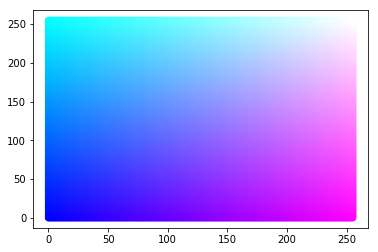

In [4]:
x = matrix[:,0]
y = matrix[:,1]
z = matrix[:,2]

colors = normalize(matrix)
plt.scatter(x, y, c=colors, alpha=1)
plt.show()

---
### Questão 03.
Utilize o algoritmo K-means com 4 clusters no conjunto de cores. Considere que o algoritmo deve encontrar clusters no espaço representados pelos eixos **x** e **y** da questão anterior, ou seja, pelo espaço bi-dimensional formado pela tupla $(r, g)$ para $r, g \in [0, 255]$. 

Plote o mesmo gráfico gerado na questão anterior, só que agora plote também os centróides encontrados pelo K-means. Utilize como opção de plot `'go'`, para protar pontos verdes nos centróides

In [0]:
def run_kmeans(n_clusters, with_clusters=False, title=""):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(np.column_stack((x, y)))
    centers = kmeans.cluster_centers_

    x_center = centers[:,0]
    y_center = centers[:,1]
    
    if with_clusters:
        new_colors = np.column_stack((centers[kmeans.labels_], np.zeros(len(kmeans.labels_)) + 255))
        new_colors = normalize(new_colors)

        plt.scatter(x, y, c=new_colors, alpha=1)
    else:
        plt.scatter(x, y, c=colors, alpha=1)
        plt.scatter(x_center, y_center, c='green', alpha=1)
    plt.title(title)
    plt.show()

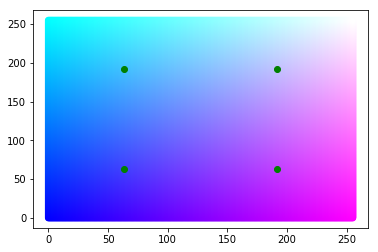

In [6]:
run_kmeans(4)

---
### Questão 04.
Represente o espaço de cores da questão 1, só que agora utilize como valor de cor dos pontos os centróides achados na questão 3. Para isso, você deve:
- Achar a representação ponto -> cluster para cada ponto
- Converter cada ponto para cordenada $(r, g)$ do seu respectivo cluster
- Adicionar mais uma coluna, com valor $255$ às cordenadas achadas anteriormente (corresponde ao valor do azul)
- Utilizar esse novo valor como cor dos pontos

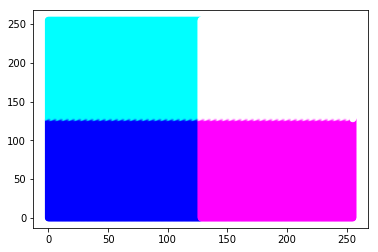

In [7]:
run_kmeans(4, with_clusters=True)



---

### Questão 05.
Repita o processo da questão anterior,  só que ao invés de utilizar os centróides achados na questão 3, ache novos centróides para `n_clusters=5`, `n_clusters=6` e `n_clusters=20`. Se preferir, utilize uma célula de código para cada plot.

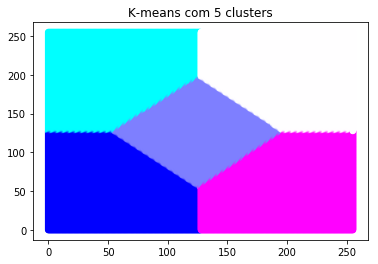

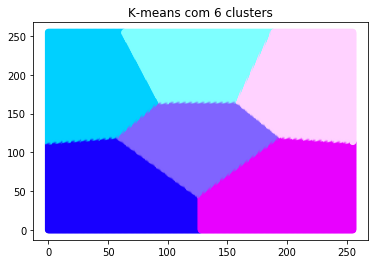

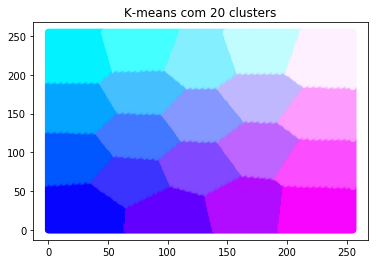

In [8]:
n_clusters = [5, 6, 20]
for cluster in n_clusters:
    title = f"K-means com {cluster} clusters"
    run_kmeans(cluster, with_clusters=True, title=title)